# Regressão Linear

In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
#Dataframe
df = pd.read_csv("../data/requisicoes_diarias.csv")
df['data'] = pd.to_datetime(df['data'])
df = df.sort_values('data').reset_index(drop=True)
df['indice_tempo'] = np.arange(len(df))

In [3]:
#Treinamento do Modelo
x = df[['indice_tempo']]
y = df['quantidade_requisicoes']

modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [5]:
#Previsão Futuro
dias_futuros = 30

#indice_futuro = np.arange(
#    df['indice_tempo'].max() + 1,
#    df['indice_tempo'].max() + 1 + dias_futuros
#).reshape(-1,1)

indice_futuro = pd.DataFrame({
    'indice_tempo': np.arange(
    df['indice_tempo'].max() + 1,
    df['indice_tempo'].max() + 1 + dias_futuros
    )
})

previsao = modelo.predict(indice_futuro)

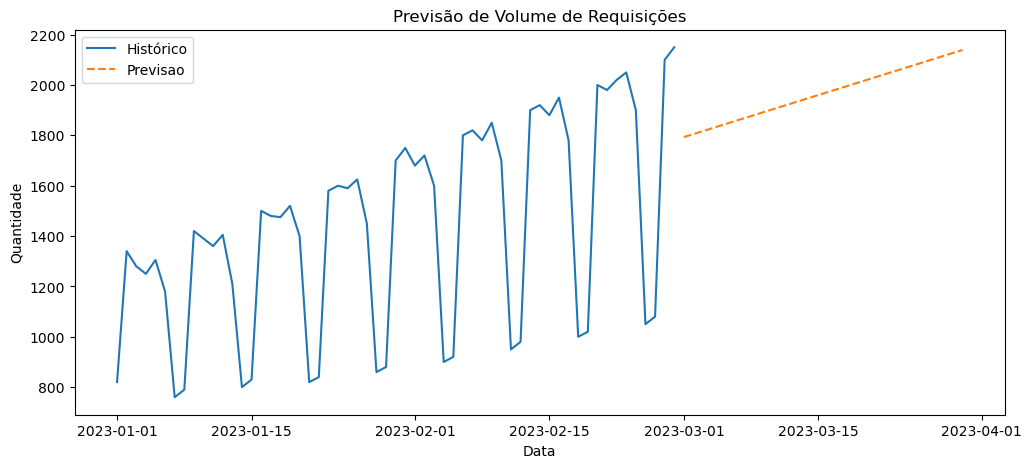

In [8]:
#Visualização
plt.figure(figsize=(12,5))

plt.plot(df['data'], y, label='Histórico')

data_futuras = pd.date_range(
    start=df['data'].max() + pd.Timedelta(days=1),
    periods=dias_futuros
)

plt.plot(data_futuras, previsao, label='Previsao', linestyle='--' )

plt.legend()
plt.title("Previsão de Volume de Requisições")
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.show()

O modelo indica uma tendência contínua de crescimento no volume de requisições. Essa previsão pode apoiar decisões sobre escalabilidade e planejamento de infraestrutura, reduzindo o risco de degradação do serviço à medida que a demanda aumenta

## Conclusão

A análise histórica mostrou um crescimento consistente no volume de requisições, com variações esperadas ao longo do tempo.  
A aplicação de técnicas de detecção de anomalias permitiu identificar desvios relevantes em relação ao comportamento esperado.  
Por fim, o modelo de previsão indicou a continuidade dessa tendência de crescimento, fornecendo subsídios para planejamento de capacidade e decisões sobre escalabilidade da infraestrutura.
